<a href="https://colab.research.google.com/github/kidd000/Acerbi_Textbook/blob/main/acerbi_CH7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

これまでのモデルでは、個人はAまたはBの2つの文化的特性のうち、どちらか1つを持つことができました。
これは利便性の高い単純化であり、共和党か民主党か、車の運転は左か右か、ベジタリアンか肉食かなど、文化的特性が二者択一でモデル化できる場合を表しています。しかし、多くの国では複数の政党に投票することができますし、いくつかの食事（ビーガン、ペスカタリアン、ベジタリアンなど）から選ぶことができるなど、選択肢が多い場合もあります。2つ以上の選択肢があるときに、他人の選択を真似するとどうなるでしょうか。この問題を簡単にするために、第1章と同様にバイアスのないコピーを仮定します。すなわち、すべての形質は同等の機能を果たし、他のランダムなエージェントからコピーされるとします。

# **7.1    複数形質のバイアスのない伝達**  

まず、コードを修正する必要があるのは、形質の表現方法です。形質の数が決まっていないので、AとBの2文字は使えません。代わりに数字を使って、形質「1」、形質「2」、形質「3」などと表現します。では、初期集団における形質の分布はどのようにすればよいのでしょうか？最初はm個の形質があると仮定して、m≦Nとします(通常、Nは集団の大きさ、つまりpopulationサイズです)。以下のシミュレーションでは、m=Nに固定して、各個体を「1」から「100」の間でランダムに選ばれた形質で初期化します。

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
N = 100

population_trait = np.random.choice(range(1,N+1),size=N,replace=True)
population_trait

array([ 6,  3, 86, 86, 56, 37,  7, 47, 15, 35, 23, 86, 94, 80, 14, 44, 90,
       65, 71, 41, 96, 37, 98, 89, 59, 82, 13, 99, 40, 61,  9,  4, 77, 70,
       55, 37, 10, 77, 17, 41, 12, 39, 89, 13,  7, 72, 13, 63, 59, 90, 21,
       15, 51, 13, 86, 35, 30, 24, 70, 57, 84,  6, 79, 80, 78, 34,  7, 85,
       67, 76, 16, 75, 67, 14, 42, 89,  9, 91, 97, 96,  2, 53, 60, 43, 19,
        9, 48, 79, 45, 94, 23, 68, 77, 69, 45, 74, 58, 45,  2, 33])

シミュレーションの基本的なコードは、第1章のコードと似ていますが、出力はどうすればよいのでしょうか？今までは、2つの形質のうち、片方の形質の頻度を保存するだけでよかったのですが、それはもう片方の形質の頻度が常に1からもう片方の形質の頻度を引いたものだったからです。今回は、N個の形質すべての頻度が必要です。（テクニカルなことを言えば、N-1個の頻度を記録するだけでよく、最後の頻度は他の頻度を1から引いて推測しますが、分かりやすさのためにすべての頻度を記録します）。

次に、各世代における形質の頻度をどのようにして測定するのでしょうか？Rの基本関数であるtabulate()がこれを行ってくれます。tabulate()は、ベクトルの各要素（ここではpopulation$trait）が、関数に渡したビンの中に出現する回数を数えます。絶対数ではなく頻度が欲しいので、結果をNで割っています。

In [3]:
def multiple_traits(N, t_max):
    #アウトプット用のデータフレームを作成
    ##generation列となるリスト
    generation = np.repeat(range(1, t_max + 1), repeats=N, axis=0)
    
    ##traits列となるリスト
    trait = np.array(list(range(N)) * t_max)

    ##p(それぞれの形質の頻度)列となるリスト
    p = np.zeros(t_max * N)

    output = pd.DataFrame()
    output["trait"] = trait
    output["generation"] = generation
    output["p"] = p

    # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy2次元アレーで代用
    p_array = np.zeros((t_max, N))

    # 形質をランダムに割り当て、初めの世代のpopulationを作る
    population_trait = np.random.choice(a=range(N), size=N,replace=True)

    # 初めの世代のpを埋める
    ## なお、Rのtabulate関数と同様の機能を持つものとして、PythonのNumpyモジュールのbincount関数を用いる 
    p_array[0, :] = np.bincount(population_trait, minlength=N)/N

    for t in range(1, t_max):
            # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達で変更を加える前に)
            previous_population_trait = population_trait
                
            # 現世代のpopulationが、ランダムに前世代のpopulation_traitリストからランダムにコピーする
            population_trait = np.random.choice(a=previous_population_trait, size=N,replace=True)

            # numpy2次元アレーにそれぞれの形質を持つ人数の頻度を代入
            p_array[t, :] = np.bincount(population_trait, minlength=N)/N

    # numpy2次元アレーをpandasのデータフレームへとラン毎に代入
    output = output.assign(p = p_array.flatten())

    #結果（プロットするデータ）をリターン
    return output  


最後に、出力をプロットするための関数は、複数のランをプロットするときにすでに用いたものと同様です。一つ違うのは、aes(color = trait)によって以下に示されるように、色付きの線が異なるランではなく、異なる形質を表していることです。新しい線 theme(legend.position = "none")は、ggplotにグラフに凡例を含めないように指示しているだけです。

In [4]:
# 結果をプロットするための関数を定義
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_traits(data_model):
    # 体裁いじいじ
    sns.set_palette("hls",n_colors=24)
    sns.set('poster', 'whitegrid', 'dark', font_scale=1,
            rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
    
    # 世代ごとの平均値推移
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x="generation", y="p", hue="trait", data=data_model, legend = "full", palette="hls")
    
    # 凡例を削除
    ax.get_legend().remove()
    
    plt.ylim(-0.1, 1.1)
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.show()

いつものように、関数を呼び出して何が起こるか見てみましょう。

In [5]:
data_model1 = multiple_traits(N=100, t_max=200)

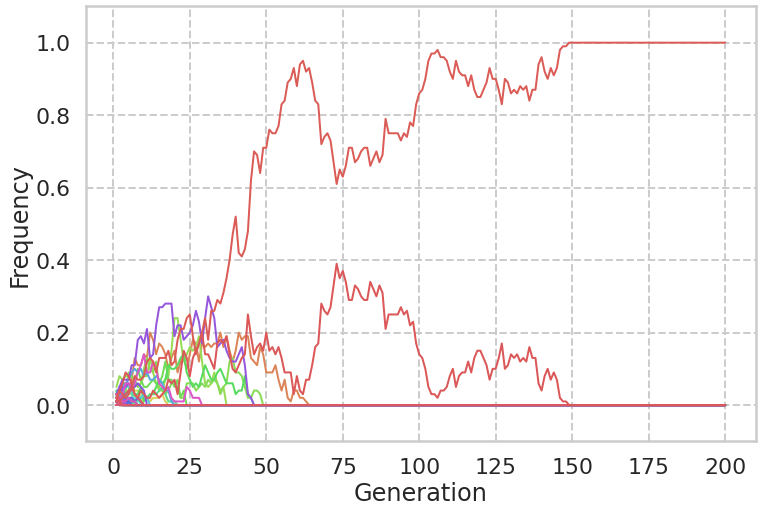

In [6]:
plot_multiple_traits(data_model1)

通常、200世代後の集団には、1つまたは2つの形質しか残っておらず、例えばtmaxを1000にすると、ほとんどすべての実験で、1つの形質しか固定化されないことになります。

In [7]:
data_model2 = multiple_traits(N=100, t_max=1000)

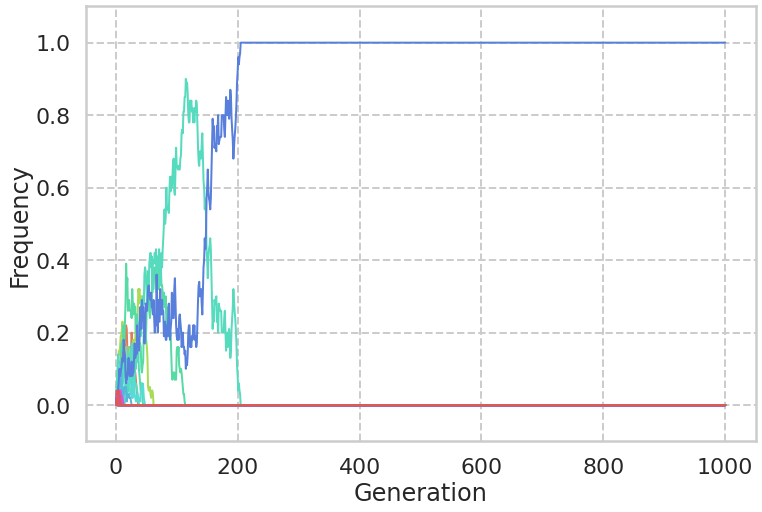

In [8]:
plot_multiple_traits(data_model2)

これは、AとBという2つの形質だけの場合に見られたことと同様です。バイアスのないコピーと比較的小さな集団では、ドリフトは強力な力を持ち、文化的多様性を急速に失わせます。

すでに説明したように、Nを増やすとドリフトの影響が小さくなります。Nとtmaxの値をいろいろと試してみてください。しかし、一貫しているポイントは、どのような場合でもバリエーションが徐々に失われていくということです。私たちがシミュレーションしているような小規模で孤立した集団では、ドリフトがもたらす均質化の効果をどのようにして打ち消すことができるでしょうか？

# **7.2　イノベーションを導入する**

一つの選択肢は、イノベーションによって新しい形質を導入することです。各時間ステップにおいて、ある個体の割合であるμが集団に新しい形質を導入することを想像してみてください。ここでは、第2章の突然変異と同じ表記法を使っています。「突然変異 (mutation)」とは、ある個体がすでに存在する形質を変えることであり、「革新 (innovation)」とは、ある個体がこれまでにない新しい形質を導入することだと考えることができます。残りの割合の個体、1-μは、先ほどと同様に、他の個体からランダムにコピーします。μ=0.01のような小さな値から始めることができます。N=100なので、各世代で、平均して1つの新しい形質が集団に導入されることになります。

次のコードは、上記の複数形質のコードにイノベーションを加えたものです。



```
# イノベーション率
mu = 0.01

# populationの中の1番大きな文化形質の値（最後に導入された形質のラベル）を記録する
last_trait = max(population_trait)

previous_population_trait = population_trait
                
population_trait = np.random.choice(a=previous_population_trait, size=N,replace=True)

# イノベーターをイノベーション率に従って、決める
innovators = np.random.choice([True, False], size=N, p=[mu, 1-mu], replace=True)

# イノベーターが1人以上いたら
if sum(innovators) > 0:
    # イノベーターの形質を新しい形質に置き換える
    population_trait[innovators] = range(last_trait+1, last_trait+1+sum(innovators))
```



ここでは2つの修正点があります。まず、誰がイノベーターなのかを選択する必要があります。そのために、再び関数sample()を使い、μでバイアスをかけて、N回、TRUE（革新者であることに対応する）またはFALSE（コピーされた文化的特徴を維持する）を選びます。

次に、正しい数字のラベルをつけて、実際に新しい形質を導入する必要があります。まず、各世代の最初に、最後に導入された形質のラベルを記録します（最初、N=100の場合、各個人の形質を1から100の間でランダムに選んで初期化するので、おそらく100になるでしょう）。新しい形質が導入されると、連続した数字のラベルが与えられます。最初の新しい形質は101、2番目は102、というように。上のコードでは、すべての新しい特性をイノベーターのスロットに一度に追加しているので、イノベーターごとに行うよりも効率的です。

あとはいつものように、すべてを関数にまとめます。

In [9]:
def multiple_traits_2(N, t_max, mu):
    # 形質が増えていくので、理論上これくらいの値になるだろうという最大形質数を設定
    ## 勝手に小数点を切り捨てて、整数(integer)にしている
    max_traits = math.floor(N + N * mu * t_max)

    #アウトプット用のデータフレームを作成
    ##generation列となるリスト
    generation = np.repeat(range(1, t_max + 1), repeats=max_traits, axis=0)
    
    ##traits列となるリスト
    trait = np.array(list(range(max_traits)) * t_max)

    ##p(それぞれの形質の頻度)列となるリスト
    p = np.zeros(t_max * max_traits)

    output = pd.DataFrame()
    output["trait"] = trait
    output["generation"] = generation
    output["p"] = p

    # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy2次元アレーで代用
    p_array = np.zeros((t_max, max_traits))

    # 形質をランダムに割り当て、初めの世代のpopulationを作る
    population_trait = np.random.choice(a=range(N), size=N, replace=True)

    # 初めの世代のpを埋める
    ## なお、Rのtabulate関数と同様の機能を持つものとして、PythonのNumpyモジュールのbincount関数を用いる 
    p_array[0, :] = np.bincount(population_trait, minlength=max_traits)/N

    for t in range(1, t_max):
        # populationの中の1番大きな文化形質の値（最後に導入された形質のラベル）を記録する
        last_trait = max(population_trait)

        # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達で変更を加える前に)
        previous_population_trait = population_trait
                        
        # 現世代のpopulationが、ランダムに前世代のpopulation_traitリストからランダムにコピーする
        population_trait = np.random.choice(a=previous_population_trait, size=N,replace=True)

        # イノベーターをイノベーション率に従って、決める
        innovators = np.random.choice([True, False], size=N, p=[mu, 1-mu], replace=True)

        # max_traitsまでしかスロットがないので、それを超えないように
        if last_trait + sum(innovators) < max_traits:
            # イノベーターが1人以上いたら
            if sum(innovators) > 0:
                # イノベーターの形質を新しい形質に置き換える
                population_trait[innovators] = range(last_trait+1, last_trait+1+sum(innovators))
                
        # numpy2次元アレーにそれぞれの形質を持つ人数の頻度を代入
        p_array[t, :] = np.bincount(population_trait, minlength=max_traits)/N

    # numpy2次元アレーをpandasのデータフレームへとラン毎に代入
    output = output.assign(p = p_array.flatten())

    #結果（プロットするデータ）をリターン
    return output  

この関数内のほぼすべての内容を理解できたと思いますが、ひとつだけ例外があります。これは、コードの実行速度が遅くならないようにするためのトリックです。ご存知の通り、出力ティブル（R/tidyverseのデータフレーム）にはすべての形質のすべての頻度が記録されています。プログラミングを行う際の注意点として、シミュレーション中に既存のTibbleに新しい行を追加するなど、データ構造のサイズを動的に変更することは避けた方がよいでしょう。可能であれば，データ構造のサイズを最初に設定し，シミュレーション中にその値を変更するようにします．つまり、イノベーションによって新しい形質が導入されたときに動的に拡張されるティブルを作成するのではなく、最初から大きなティブルを作成するのです。どのくらいの大きさがいいのか？はっきりしたことはわかりませんが、おおよその目安としては、初期形質（N）に加えて、世代ごとに追加される形質（Nμ）程度のスペースが必要になります。

この推定値を超えないようにするために、イノベーション命令を if ((last_trait + sum (innovators)) < max_traits) という条件で囲みます。これにより、ティブルが一杯になったときにイノベーションを防ぐことができます。このコード指示によって、最後の数世代でイノベーションが起こらなくなるかもしれませんが、我々の目的には無視できる程度の影響です。

それでは、この関数を革新率μ=0.01、100個体のpopulationで、200世代にわたって実行してみましょう。

In [10]:
data_model3 = multiple_traits_2(N=100, t_max=200, mu=0.01)

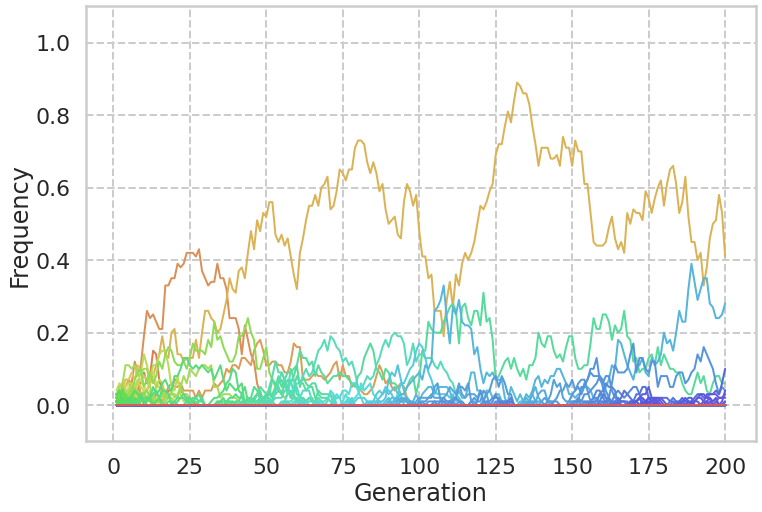

In [11]:
plot_multiple_traits(data_model3)

イノベーションにより、シミュレーション終了時に残存する頻度の形質が、技術革新ができなかったときよりも多くなるはずです。正確な数を確認するには、行列の最後の行で、0より高い頻度がいくつあるかを調べます。

In [12]:
data_model3_index = data_model3.set_index("generation")

In [13]:
np.count_nonzero(data_model3_index["p"][200]) # 200は最終世代の番号

10

先ほどと同じように、世代数（タイムステップ）を1000まで増やすとどうなるでしょうか。

In [14]:
data_model4 = multiple_traits_2(N=100, t_max=1000, mu=0.01)

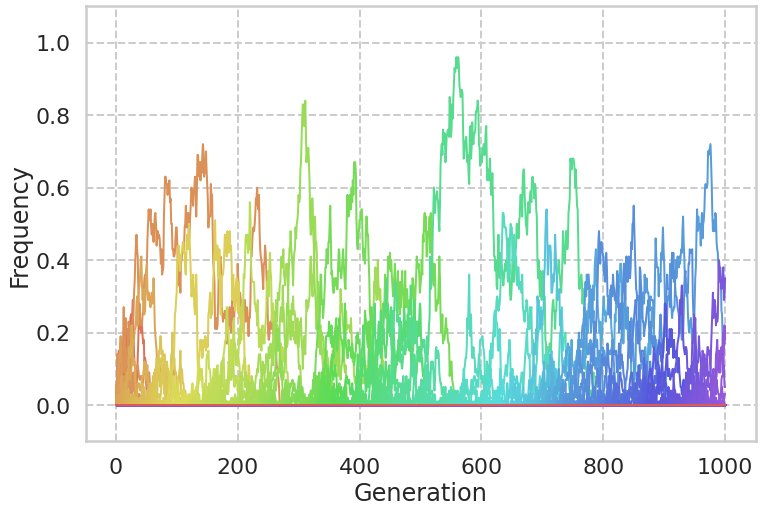

In [15]:
plot_multiple_traits(data_model4)

プロットを見ればわかるように、1000世代後でも、頻度が0よりも高い形質がいくつかあるはずです。先ほどと同じように、最終世代で残っている正確な数を求めることができます。

In [16]:
data_model4_index = data_model4.set_index("generation")

In [17]:
np.count_nonzero(data_model4_index["p"][1000]) # 1000は最終世代の番号

7

つまり、イノベーションによって、小さな集団でもバリエーションを維持することができるのです。

# **7.3　コードを最適化する**

省略

In [18]:
def multiple_traits_numpy_array(N, t_max, mu):
    # 形質が増えていくので、理論上これくらいの値になるだろうという最大形質数を設定
    ## 勝手に小数点を切り捨てて、整数(integer)にしている
    max_traits = math.floor(N + N * mu * t_max)

    # numpy2次元アレー
    p_array = np.zeros((t_max, max_traits))

    # 形質をランダムに割り当て、初めの世代のpopulationを作る
    population_trait = np.random.choice(a=range(N), size=N, replace=True)

    # 初めの世代のpを埋める
    ## なお、Rのtabulate関数と同様の機能を持つものとして、PythonのNumpyモジュールのbincount関数を用いる 
    p_array[0, :] = np.bincount(population_trait, minlength=max_traits)/N

    for t in range(1, t_max):
        # populationの中の1番大きな文化形質の値（最後に導入された形質のラベル）を記録する
        last_trait = max(population_trait)

        # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達で変更を加える前に)
        previous_population_trait = population_trait
                        
        # 現世代のpopulationが、ランダムに前世代のpopulation_traitリストからランダムにコピーする
        population_trait = np.random.choice(a=previous_population_trait, size=N,replace=True)

        # イノベーターをイノベーション率に従って、決める
        innovators = np.random.choice([True, False], size=N, p=[mu, 1-mu], replace=True)

        # max_traitsまでしかスロットがないので、それを超えないように
        if last_trait + sum(innovators) < max_traits:
            # イノベーターが1人以上いたら
            if sum(innovators) > 0:
                # イノベーターの形質を新しい形質に置き換える
                population_trait[innovators] = range(last_trait+1, last_trait+1+sum(innovators))
                
        # numpy2次元アレーにそれぞれの形質を持つ人数の頻度を代入
        p_array[t, :] = np.bincount(population_trait, minlength=max_traits)/N

    #結果（プロットするデータ）をリターン
    return p_array

# **7.4　人気度の分布**

これらのシミュレーションの興味深い点は、すべての形質が機能的に同等であり、伝達にバイアスがない場合でも、ランダムな理由でいくつかの形質が他の形質よりも成功することです。これを視覚化するには、累積人気度、つまり全世代にわたる数量の合計をプロットします。この行列があれば、各列の合計にNを乗じることで簡単に計算できます（これらは頻度ですが、今は実際の量を可視化したいことを覚えておいてください）。また、0より大きい値だけを残しておく必要があります。0に等しい値は、形質で満たされることのなかった、最初の行列で作られた空のスロットです。

In [19]:
data_model5 = multiple_traits_numpy_array(N=100, t_max=1000, mu=0.01)

人気の高いものから低いものへと並べ替えて、結果をプロットしてみましょう。

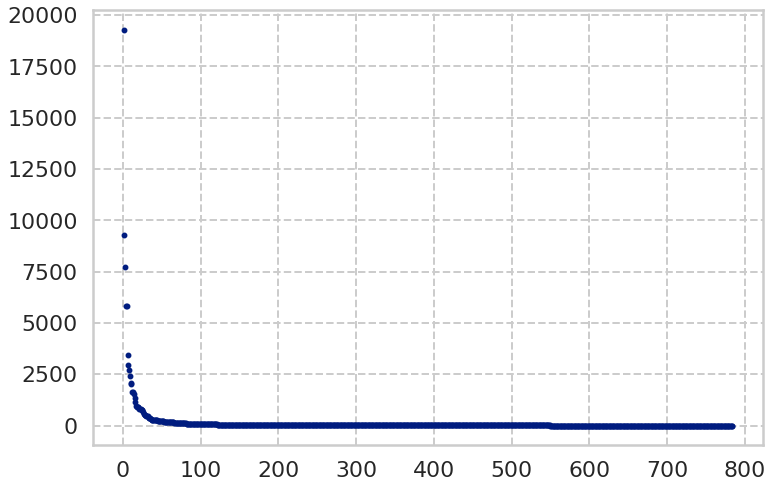

In [22]:
cumulative_sort = np.sort(cumulative)[::-1]*N

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=range(1,len(cumulative_sort)+1), y=cumulative_sort, s=15)
plt.show()

これはロングテール分布の一例です。大多数の形質は集団の中で広がらず、その累積人気度は1に非常に近いものです。一方で、ごく少数の形質（プロットの左側）は、大成功を収めます。先ほどのようなロングテールの分布は、文化的な特徴では非常によく見られます。映画や本、名前など、ごく少数のものは非常に人気がありますが、大多数のものはそうではありません。また、これらの領域では、人気のある特徴は、人気のない特徴よりもはるかに人気があります。今回プロットしたデータの平均累積人気度は106.2ですが、最も成功した形質の人気度は23891です。

このような分布を描くには、指数関数的に大きくなる間隔でデータをビンニングするのが一般的です。言い換えれば、累積人気度が1から2の間にある形質が何個あるか、次に2から4の間にあるか、4から8の間にあるか、というように、累積人気度の最大値に達するまでを知りたいのです。以下のコードでは、forサイクルを使って各ビンに入る形質の数を求め、さらにビンの大きさに応じて正規化しています。すべての累積人気度が含まれるように、理論的な最大ビンサイズである2**50になるまで、サイズを増やしています。

In [23]:
bin = np.zeros(50)
x = np.zeros(50)

for i in range(50):
    # 2**(i-1)～2**iの間にある形質の数をbinに入れる
    bin[i] = sum((2**(i-1) <= cumulative_sort) & (cumulative_sort <= 2**i))
    # binの最大数（2**(i-1)）と全部の形質の数で、上で求めた形質の数を割る
    bin[i] = (bin[i] / len(cumulative)) / 2**(i-1)
    x[i] = 2**i

空のビンをフィルタリングした後、データをlog-logプロットで可視化することができます。log-logプロットは、両方の軸に対数スケールを使用するグラフです。対数軸を使うのは、このケースのように、データが大きな値に偏っている場合に便利です。先のプロットでは、大部分のデータポイント、例えば累積人気度が1～10のポイントは、X軸の近くに集まっているため、違いを視覚的に理解することができませんでした。

In [24]:
data_to_plot = pd.DataFrame()
data_to_plot["bin"] = np.log10(bin)
data_to_plot["x"] = np.log10(x)
data_to_plot[bin>0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


,bin,x
0,-0.417195,0.00000
1,-0.523248,0.30103
2,-0.912045,0.60206
3,-1.258330,0.90309
4,-1.772100,1.20412
5,-2.217622,1.50515
6,-2.746254,1.80618
7,-3.087712,2.10721
8,-3.586553,2.40824
9,-4.126465,2.70927


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


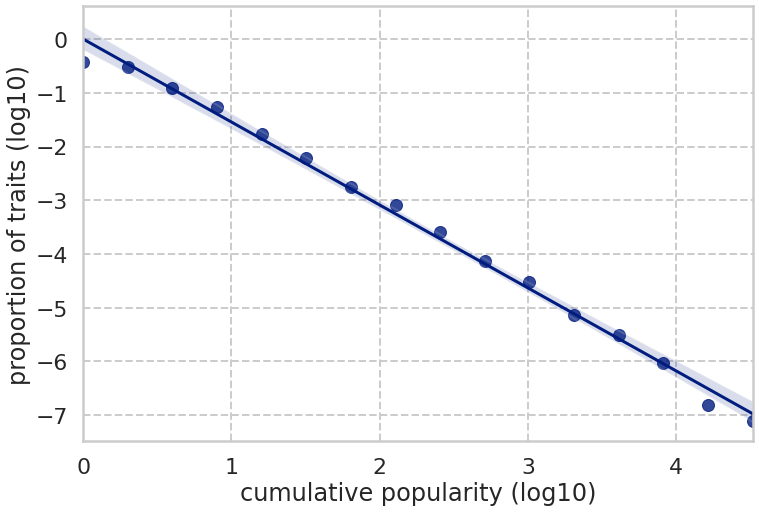

In [28]:
data_to_plot = pd.DataFrame(data={'bin': np.log10(bin), 'x': np.log10(x)})
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x="x", y="bin", data=data_to_plot[bin>0])
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("cumulative popularity (log10)")
plt.ylabel("proportion of traits (log10)")
plt.show()

<function matplotlib.pyplot.show>

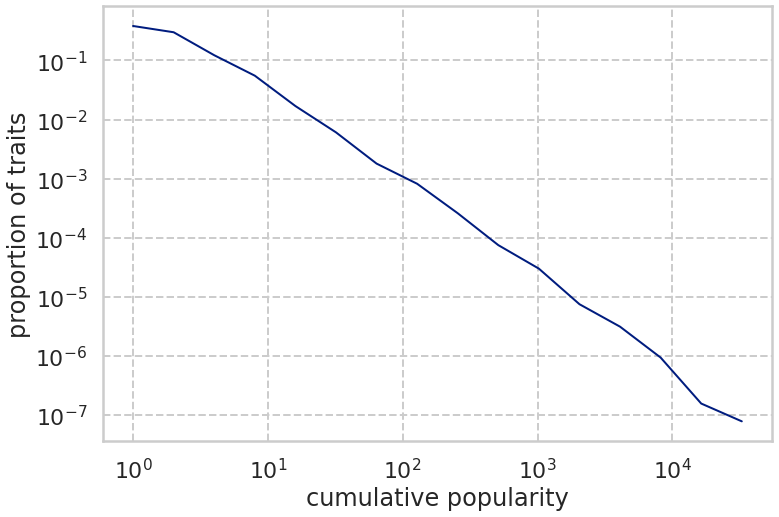

In [27]:
data_to_plot = pd.DataFrame(data={'bin': bin, 'x': x})
f, ax = plt.subplots(figsize=(12, 8))
plt.xscale('log')
plt.yscale('log')
plt.loglog("x","bin",data=data_to_plot[bin>0])
plt.xlabel("cumulative popularity")
plt.ylabel("proportion of traits")
plt.show

log-logスケールでは、偏りのないコピーによる累積人気度の分布は、ほぼ直線上にある（この直線的なベストフィットラインは、stat_smooth(method = "lm")コマンドで生成される）。この対数プロット上の直線は、「ベキ」度数分布として知られている。適合度と直線の傾きを利用して、異なるタイプの文化的伝達を比較することができます。例えば、ある程度の同調バイアスを加えた場合、上記のべき乗則はどうなるでしょうか？デモンストレータベースのバイアスだと、どうなるでしょうか？また、実世界の文化的なデータセットに対して同等のプロットを作成し、実世界でこれらの分布を生成したプロセスに関する仮説を検証することもできます。

# **7.5　モデルのまとめ**

この章では、個体が2つ以上の形質のうち1つを持つことができる場合をシミュレーションしました。最も単純なバイアスのない伝達の場合を検討しました。また、個体がある確率で新しい形質を集団の文化プールに導入する、イノベーションの可能性についても検討しました。個々のイノベーションは，ドリフトによる均質化の効果を打ち消し，徐々に失われていく形質を置き換えることになります。

複数の形質とイノベーションをシミュレートするためには、最初に導入した未知数の新しい形質をどのように追跡するかなど、いくつかのコード上のテクニカルな問題に対処する必要がありました。データ構造のサイズは、シミュレーション中に動的に変更するのではなく、最初から必要なサイズのものを作っておくのがベストだということがわかりました。また、シミュレーションが複雑になってきたら、適切なデータ構造を使用することが重要であることもわかりました。ティブルを行列に置き換えることで、シミュレーションを100倍高速化することができました。

結果として、バイアスのないコピーでは、ごく少数の形質が非常に人気があり、大多数の形質は人気がないというロングテールの分布が得られることがわかりました。このモデルの興味深い点は、このような極端な分布は、必ずしも個人レベルの極端な傾向から生じるものではないということです。例えば、個人が人気のある形質にバイアスを持っていなくても、ある形質は他の形質よりも非常に人気になります。文化的な伝達では、バイアスがなくても、人気のある形質はランダムにコピーされやすいという本質的な利点があるため、このような分布が生まれるのです。また、この結果を可視化するために、ビン分けされた人気度分布の対数プロットという新しい手法を導入しました。

# **7.6　さらに学びたい人のために**

Neiman(1995)は、新石器時代の土器群の人気度分布を説明するために、複数の特徴を持つバイアスのないコピーのモデルを初めて導入した。Bentley, Hahn, and Shennan (2004) は、このアイデアを詳しく説明し、「ランダムコピー」モデル（本章で開発したものと同等）を提示し、生成された人気度分布を、米国における名字の頻度分布や特許の引用度などの実際のデータセットと比較した。Mesoudi and Lycett (2009) は、基本モデルに伝達バイアス（同調など）を加えることで、結果として得られるべき乗則の頻度分布がどのように変化するかを調べました。